In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
#reading the data set named as train
tr=pd.read_csv("loan-train.csv",header=0)
test=pd.read_csv("loan-test.csv",header=0)

In [3]:
tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
tr.sample(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
131,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
348,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
547,LP002772,Male,No,0,Graduate,No,2526,1783.0,145.0,360.0,1.0,Rural,Y


In [5]:
test.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
218,LP002195,Male,Yes,1,Graduate,Yes,3507,3148,212.0,360.0,1.0,Rural
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban
170,LP001961,Female,No,0,Graduate,No,3958,0,110.0,360.0,1.0,Rural


In [6]:
print(tr.shape)
print(test.shape)

(614, 13)
(367, 12)


In [7]:
tr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
tr.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Data Cleaning

In [9]:
tr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
percent_missing_tr=tr.isnull().sum()*100/len(tr)
percent_missing_tr

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
percent_missing_test=test.isnull().sum()*100/len(test)
percent_missing_test

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [12]:
train=tr.dropna(axis=0,how='any')
tests=test.dropna(axis=0,how='any')

In [13]:
train.shape

(480, 13)

In [14]:
# identify columns with missing values
cols_with_missing_tr = ['Gender', 'Dependents', 'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

# calculate the mean for each column with missing values
means = tr[cols_with_missing_tr].mean()

# replace missing values with mean for each column
tr[cols_with_missing_tr] = tr[cols_with_missing_tr].fillna(means)

print(tr)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

In [15]:
# identify columns with missing values
cols_with_missing_test = ['Gender', 'Dependents', 'Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

# calculate the mean for each column with missing values
means = test[cols_with_missing_test].mean()

# replace missing values with mean for each column
test[cols_with_missing_test] = test[cols_with_missing_test].fillna(means)

print(test)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [16]:
str_train = tr.select_dtypes(include=['object'])
str_test = test.select_dtypes(include=['object'])

In [17]:
num_train = tr.select_dtypes(include=['int','float'])
num_test = test.select_dtypes(include=['int','float'])

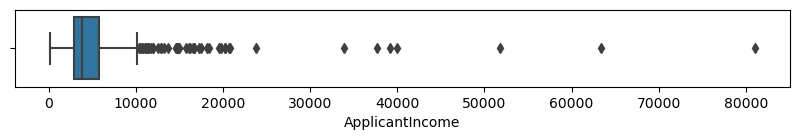

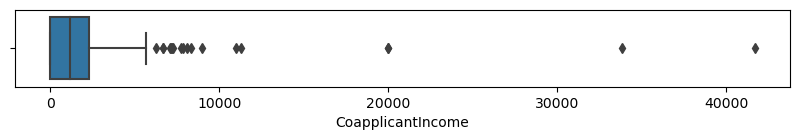

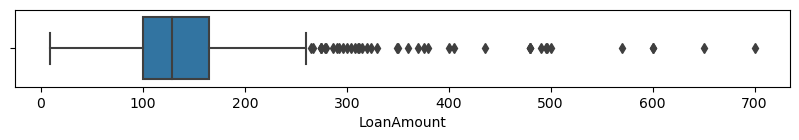

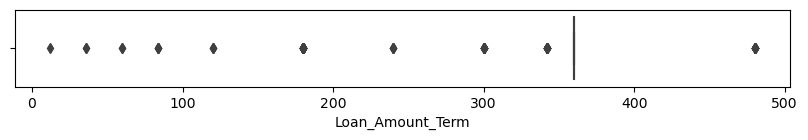

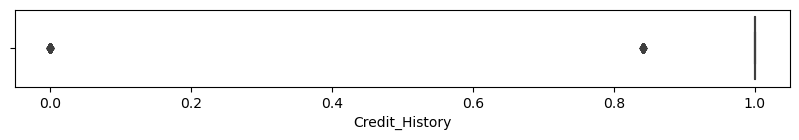

In [18]:
# Applying a box-plot to check the outliers in training data
for column in num_train:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_train,x=column)

In [19]:
# outlier treatment for training data

def cap_data(num_train):
    for col in num_train.columns:
        print("capping the",col)
        if (((num_train[col].dtype)=='float64')|((num_train[col].dtype)=='int64')):
            percentiles = num_train[col].quantile([0.25,0.75]).values
            num_train[col][num_train[col] <= percentiles[0]] = percentiles[0]
            num_train[col][num_train[col] >= percentiles[1]] = percentiles[1]
        else:
            num_train[col]=num_train[col]
    return num_train
final_num_train = cap_data(num_train)


capping the ApplicantIncome
capping the CoapplicantIncome
capping the LoanAmount
capping the Loan_Amount_Term
capping the Credit_History


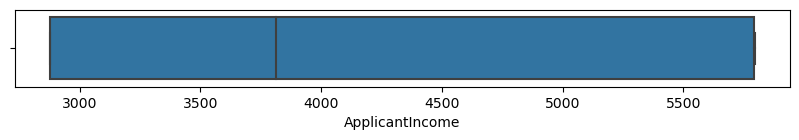

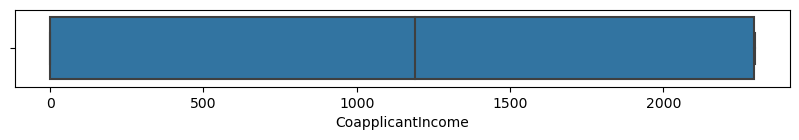

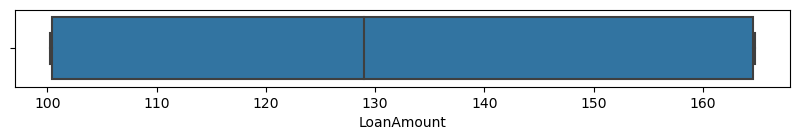

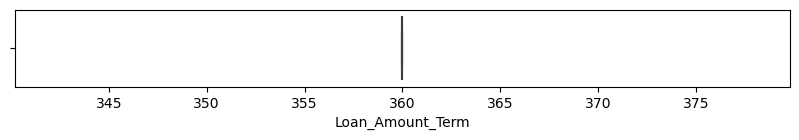

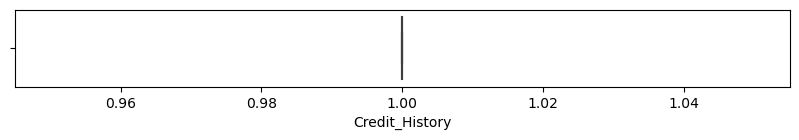

In [20]:
# Applying a box-plot to check the outliers
for column in num_train:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_train,x=column)

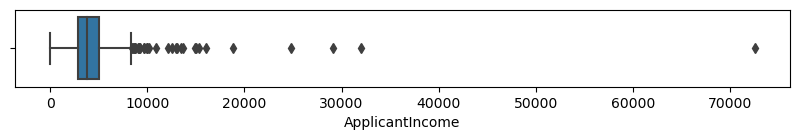

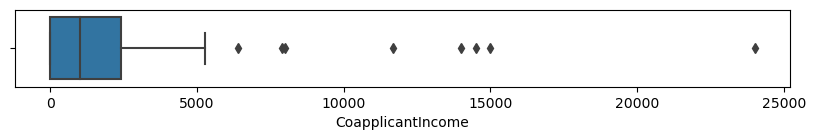

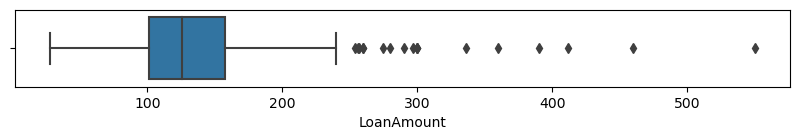

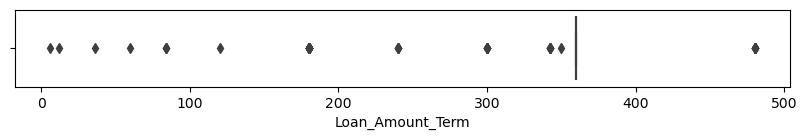

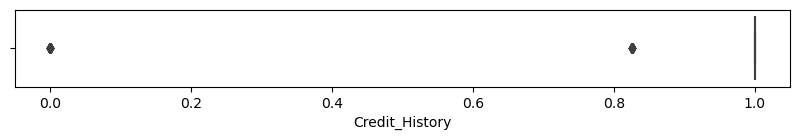

In [21]:
# Applying a box-plot to check the outliers in testing data
for column in num_test:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_test,x=column)

In [22]:
# outlier treatment on testing data

def cap_data(num_test):
    for col in num_test.columns:
        print("capping the",col)
        if (((num_test[col].dtype)=='float64')|((num_test[col].dtype)=='int64')):
            percentiles = num_test[col].quantile([0.25,0.75]).values
            num_test[col][num_test[col] <= percentiles[0]] = percentiles[0]
            num_test[col][num_test[col] >= percentiles[1]] = percentiles[1]
        else:
            num_test[col]=num_test[col]
    return num_test
final_num_test = cap_data(num_test)


capping the ApplicantIncome
capping the CoapplicantIncome
capping the LoanAmount
capping the Loan_Amount_Term
capping the Credit_History


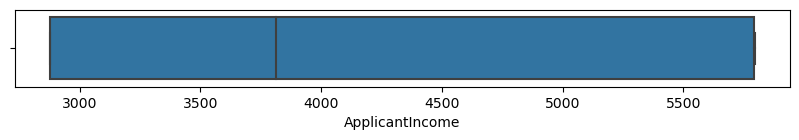

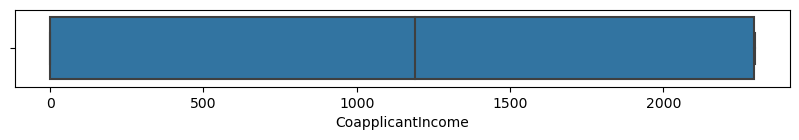

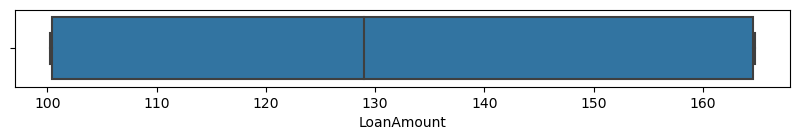

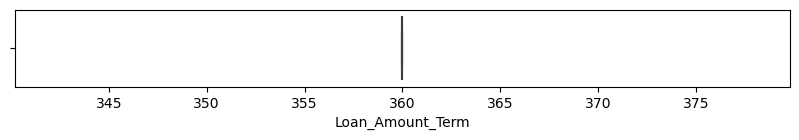

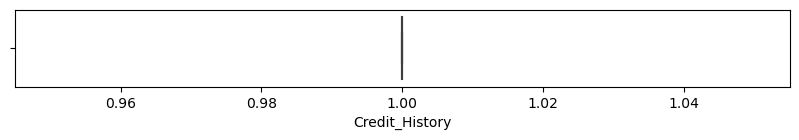

In [23]:
# Applying a box-plot to check the outliers in testing data
for column in num_train:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_train,x=column)

In [24]:
# List of columns to impute missing values
cols_to_impute = ['Gender', 'Married', 'Dependents','Self_Employed']

# Impute missing values with mode
for col in cols_to_impute:
    mode_col = tr[col].mode()[0]
    tr[col].fillna(mode_col, inplace=True)


In [25]:
# List of columns to impute missing values
cols_to_impute = ['Gender', 'Married', 'Dependents','Self_Employed']

# Impute missing values with mode
for col in cols_to_impute:
    mode_col = test[col].mode()[0]
    test[col].fillna(mode_col, inplace=True)


In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data = str_train.apply(label.fit_transform)
train_data = train_data.join(num_train)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,1,5795.0,0.00,146.412162,360.0,1.0
1,1,1,1,1,0,0,0,0,4583.0,1508.00,128.000000,360.0,1.0
2,2,1,1,0,0,1,2,1,3000.0,0.00,100.250000,360.0,1.0
3,3,1,1,0,1,0,2,1,2877.5,2297.25,120.000000,360.0,1.0
4,4,1,0,0,0,0,2,1,5795.0,0.00,141.000000,360.0,1.0


In [27]:
test_data = str_train.apply(label.fit_transform)
test_data = test_data.join(num_test)
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,2,1,5060.0,0.0,110.0,360.0,1.0
1,1,1,1,1,0,0,0,0,3076.0,1500.0,126.0,360.0,1.0
2,2,1,1,0,0,1,2,1,5000.0,1800.0,157.5,360.0,1.0
3,3,1,1,0,1,0,2,1,2864.0,2430.5,101.0,360.0,1.0
4,4,1,0,0,0,0,2,1,3276.0,0.0,101.0,360.0,1.0


In [28]:
train_data.shape

(614, 13)

<AxesSubplot:>

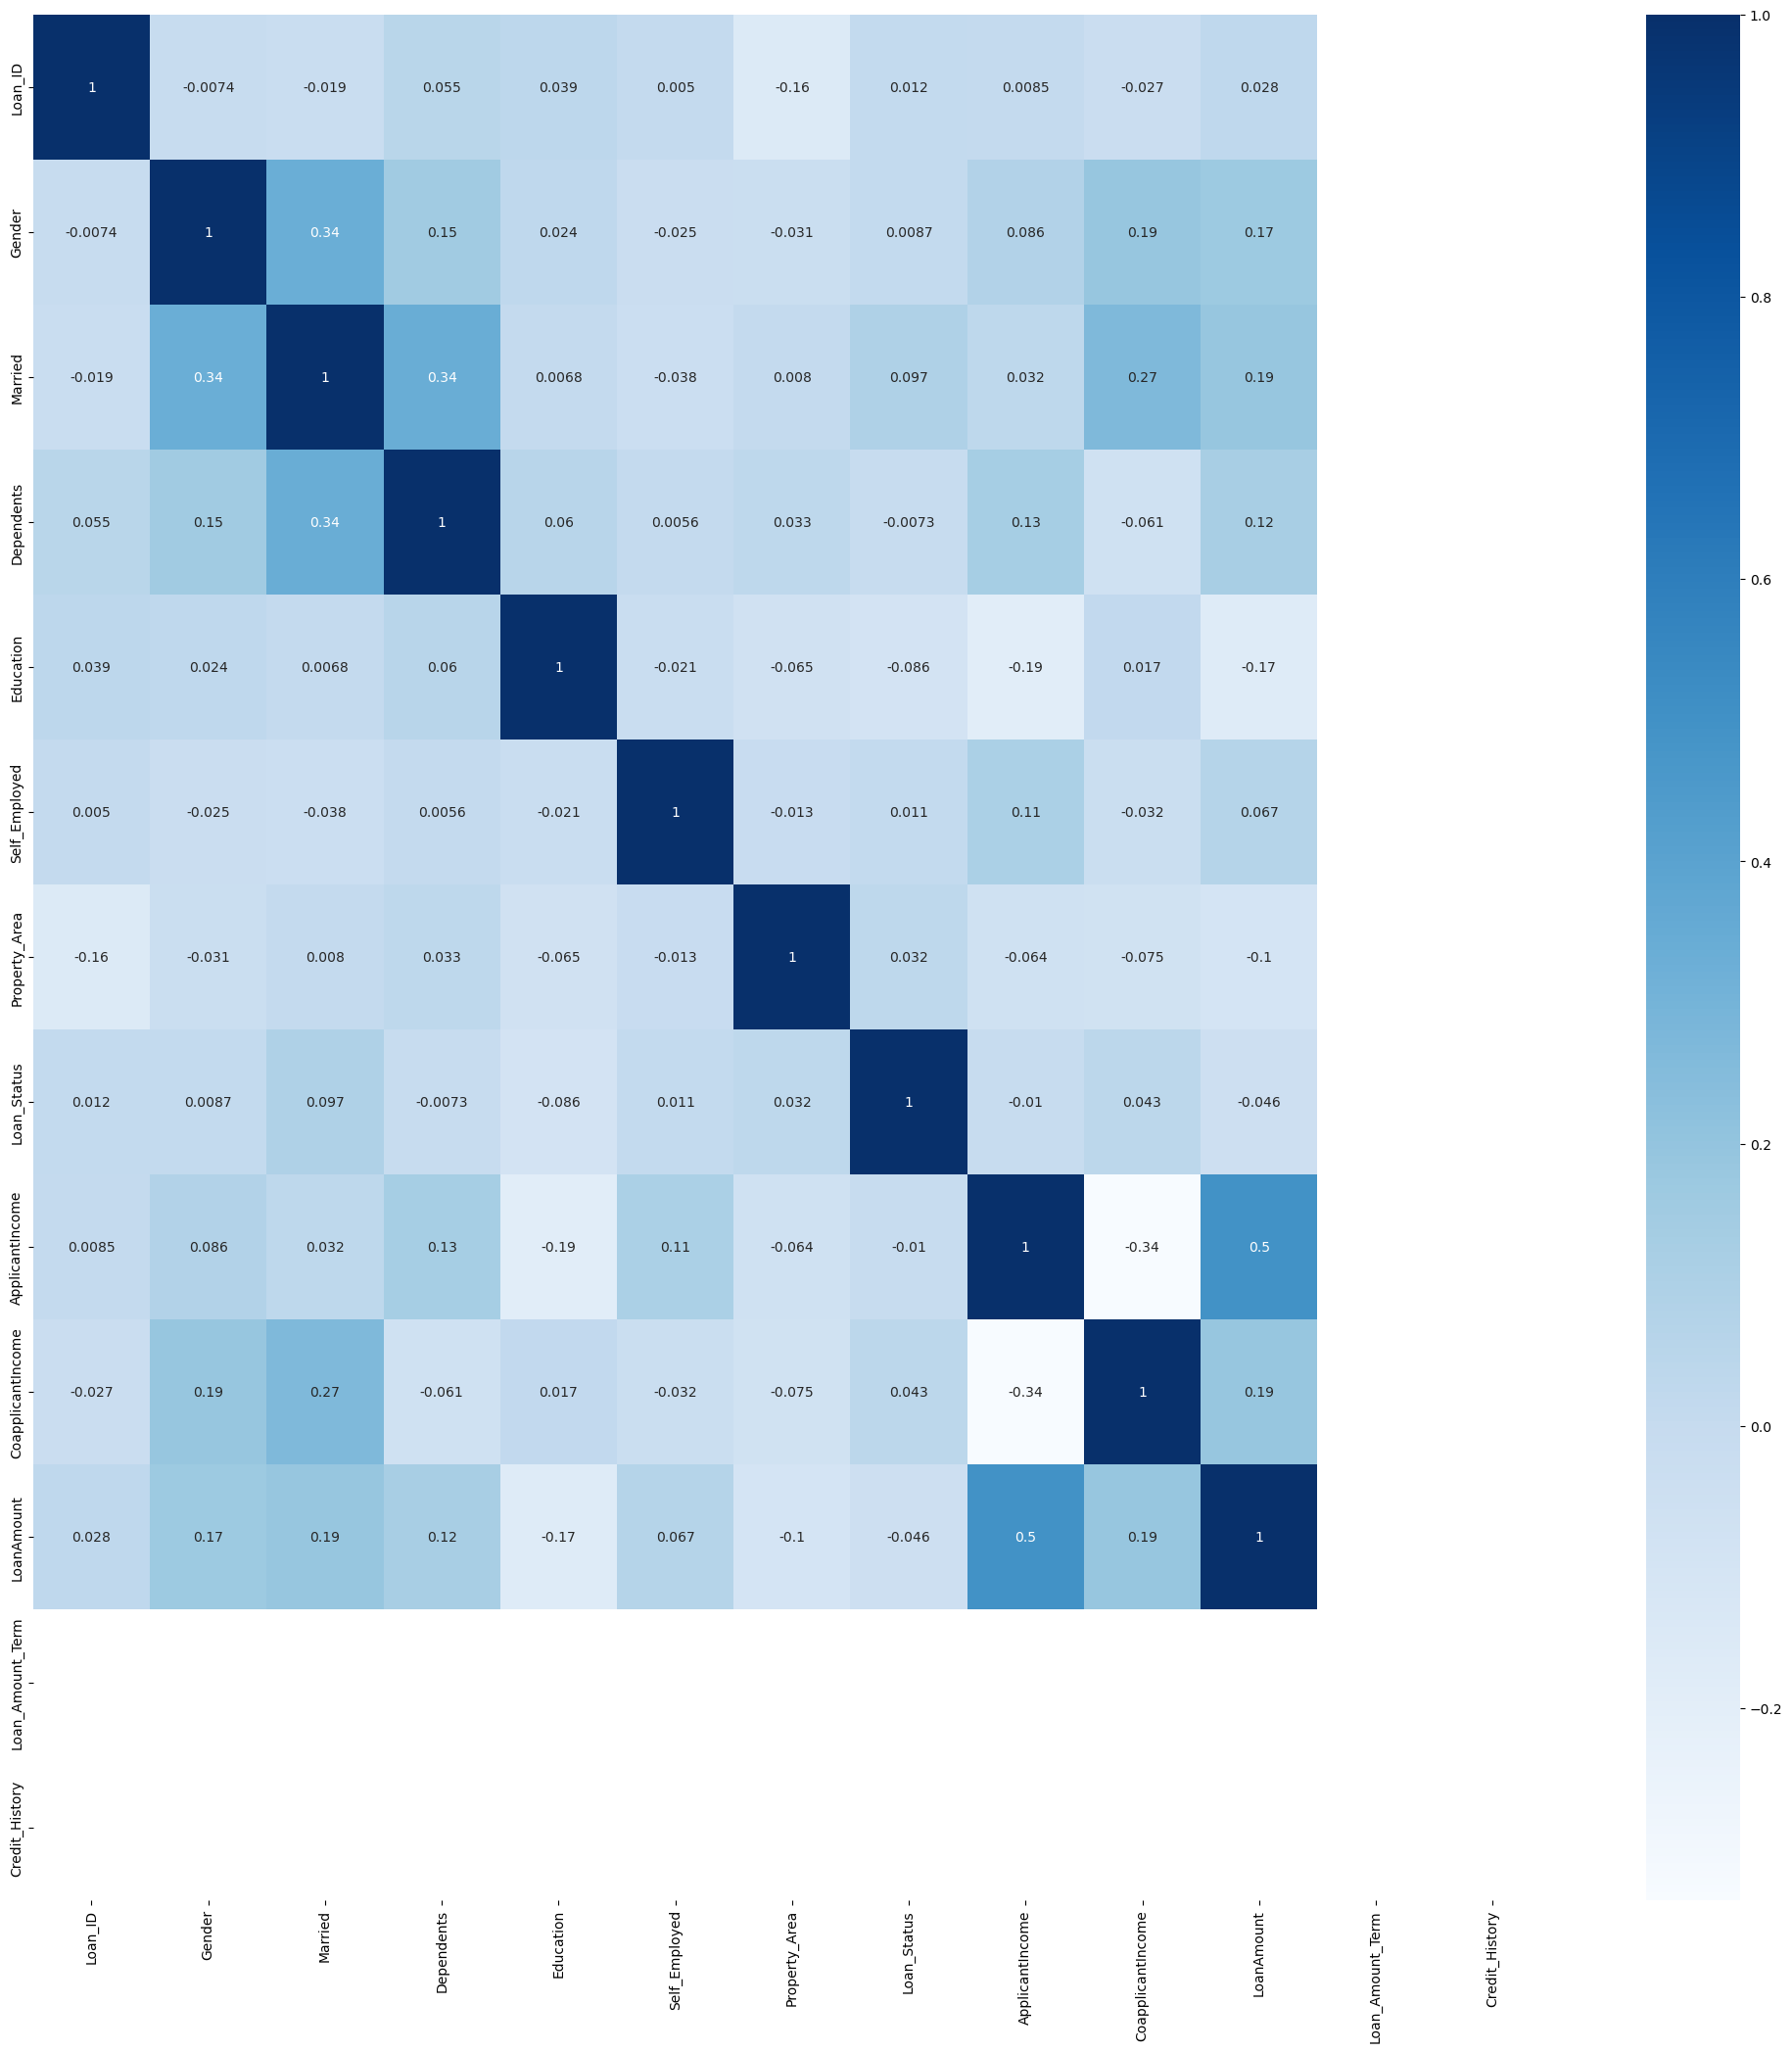

In [29]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(),cbar=True,annot=True,cmap='Blues')

In [30]:
# Define target variable and list of features
target_var = "Loan_Status"
features = train_data.select_dtypes(include='number').columns.tolist()
features.remove(target_var)

# Set correlation threshold
corr_threshold = 0.1

# Drop features with low correlation
for feature in features:
    corr = train_data[feature].corr(train_data[target_var])
    if abs(corr) < corr_threshold:
        train_data = train_data.drop(columns=[feature])
        print(f"Dropped column {feature} due to low correlation with target variable.")

Dropped column Loan_ID due to low correlation with target variable.
Dropped column Gender due to low correlation with target variable.
Dropped column Married due to low correlation with target variable.
Dropped column Dependents due to low correlation with target variable.
Dropped column Education due to low correlation with target variable.
Dropped column Self_Employed due to low correlation with target variable.
Dropped column Property_Area due to low correlation with target variable.
Dropped column ApplicantIncome due to low correlation with target variable.
Dropped column CoapplicantIncome due to low correlation with target variable.
Dropped column LoanAmount due to low correlation with target variable.


# model fitting

In [31]:
# separating input from output
xtrain=train_data.drop(["Loan_Status"],axis=1)
xtrain.shape

(614, 2)

In [32]:
test_data.shape

(614, 13)

In [33]:
ytrain=train_data["Loan_Status"]
ytrain.shape

(614,)

# train-test split

In [34]:
# Importing the train test split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain,test_size=0.20,random_state=20)

In [35]:
y_train = np.array(y_train).reshape((-1, 1))

# feature scaling

In [36]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [37]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train)

In [38]:
# Transforming the training data into standard

X_train_std = sc.transform(X_train)
X_train_std

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

# Model Building without sklearn

In [39]:
import numpy as np

class LogisticRegression:
        
    def __init__(self, learning_rate=0.01, num_iterations=10000, y_pred = None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    
    def softmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
    
    def fit(self, X, y, n_classes, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
        
        for i in range(num_iterations):
            Z = np.dot(X, self.weights) + self.bias
            
            if n_classes == 2:
                A = self.sigmoid(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
                dZ = A - y
            else:
                A = self.softmax(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A))
                dZ = A - y
            
            dw = (1/n_samples) * np.dot(X.T, dZ)
            db = (1/n_samples) * np.sum(dZ)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        
        if self.weights.shape[0] == 1:
            A = self.sigmoid(Z)
            return np.round(A)
        else:
            A = self.softmax(Z)
            return np.argmax(A, axis=1)


In [40]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_std, y_train,n_classes=2)
y_pred = model.predict(X_test)

In [41]:
# Importing accuracy-score
from sklearn.metrics import accuracy_score

# Checking the accuracy Score
accuracy_score(y_test,y_pred)

0.4146341463414634

# Model building with sklearn

In [42]:
# Importing the train test split 

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(xtrain, ytrain,test_size=0.25,random_state=2)

In [43]:
y_train1 = np.array(y_train1).reshape((-1, 1))

In [44]:
# feature scaling

In [45]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [46]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train1)

In [47]:
# Transforming the training data into standard

X_train_std1 = sc.transform(X_train1)
X_train_std1

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [48]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std1, y_train1)
predictions = model.predict(X_test1)

In [49]:
# Checking the accuracy Score

# Importing accuracy-score
from sklearn.metrics import accuracy_score
accuracy_score(y_test1, predictions)

0.6688311688311688

In [50]:
# storing the model accuracy

# Retrieve the accuracy scores for stroke_prediction Model  without-sklearn in Notebook 1
%store -r model1_nb1_scores

# Retrieve the accuracy scores for stroke_prediction Model with-sklearn Model  in Notebook 1
%store -r model2_nb1_scores


# Retrieve the accuracy scores for diabities without sklearn Model  in Notebook 2
%store -r model1_nb2_scores

# Retrieve the accuracy scores for diabities Model with sklearn in Notebook 2
%store -r model2_nb2_scores


# Retrieve the accuracy scores for wine_quality without sklearn model in Notebook 3
%store -r model1_nb3_scores

# Retrieve the accuracy scores for wine_quality withsklearn in Notebook 3
%store -r model2_nb3_scores

# Retrieve the accuracy scores for HR without sklearn model in Notebook 3
%store -r model1_nb4_scores

# Retrieve the accuracy scores for HR with sklearn in Notebook 3
%store -r model2_nb4_scores

# Define the accuracy scores for Model 1 in Notebook 4
model1_nb5_scores = [0.4146]

# Store the scores for Model 1 in Notebook 4
%store model1_nb5_scores

# Define the accuracy scores for Model 2 in Notebook 4
model2_nb5_scores = [0.6688]

# Store the scores for Model 2 in Notebook 4
%store model2_nb5_scores


Stored 'model1_nb5_scores' (list)
Stored 'model2_nb5_scores' (list)


In [52]:
from IPython.display import HTML

# Retrieve the accuracy scores for all models from different notebooks
%store -r model1_nb1_scores
%store -r model2_nb1_scores
%store -r model1_nb2_scores
%store -r model2_nb2_scores
%store -r model1_nb3_scores
%store -r model2_nb3_scores
%store -r model1_nb4_scores
%store -r model2_nb4_scores
%store -r model1_nb5_scores
%store -r model2_nb5_scores


In [54]:
# Create a list of tuples for the accuracy scores of each model
models_scores = [("Stroke_Prediction", "without sklearn", model1_nb1_scores), 
                 ("Stroke_Prediction", "with sklearn", model2_nb1_scores),
                 ("diabities", "without sklearn", model1_nb2_scores),
                 ("diabities", "with sklearn", model2_nb2_scores),
                 ("wine_quality", "without sklearn", model1_nb3_scores),
                 ("wine_quality", "with sklearn", model2_nb3_scores),
                 ("HR_Analytics", "without sklearn", model1_nb4_scores),
                 ("HR_Analytics", "with sklearn", model2_nb4_scores),
                 ("Loan", "without sklearn", model1_nb5_scores),
                 ("Loan", "with sklearn", model2_nb5_scores)]

# Create a HTML table to display the accuracy scores
table_content = "<table><thead><tr><th>Model</th><th>TypeOfModel</th><th>Accuracy Scores</th></tr></thead><tbody>"
for model, library, scores in models_scores:
    table_content += "<tr><td>{}</td><td>{}</td><td>{}</td></tr>".format(model, library, str(scores))
table_content += "</tbody></table>"
display(HTML(table_content))


Model,TypeOfModel,Accuracy Scores
Stroke_Prediction,without sklearn,[0.9478]
Stroke_Prediction,with sklearn,[0.9536]
diabities,without sklearn,[0.6964]
diabities,with sklearn,[0.7232]
wine_quality,without sklearn,[0.7265]
wine_quality,with sklearn,[0.958]
HR_Analytics,without sklearn,[0.756]
HR_Analytics,with sklearn,[0.7503]
Loan,without sklearn,[0.4146]
Loan,with sklearn,[0.6688]


In [57]:
# Create a list of tuples for the accuracy scores of each model
models_scores = [("Stroke_Prediction", "without sklearn", model1_nb1_scores),
                 ("Stroke_Prediction", "with sklearn", model2_nb1_scores), 
                 ("diabities", "without sklearn", model1_nb2_scores),
                 ("diabities", "with sklearn", model2_nb2_scores),
                 ("wine_quality", "without sklearn", model1_nb3_scores),
                 ("wine_quality", "with sklearn", model2_nb3_scores),
                 ("HR_Analytics", "without sklearn", model1_nb4_scores),
                 ("HR_Analytics", "with sklearn", model2_nb4_scores),
                 ("Loan", "without sklearn", model1_nb5_scores),
                 ("Loan", "with sklearn", model2_nb5_scores)]

# Create a HTML table to display the accuracy scores
table_content = "<table><thead><tr><th>Model</th><th>Accuracy Scores (without sklearn)</th><th>Accuracy Scores (with sklearn)</th></tr></thead><tbody>"
for model_name, sklearn_type, scores in models_scores:
    if sklearn_type == "without sklearn":
        table_content += "<tr><td>{}</td><td>{}</td><td></td></tr>".format(model_name, str(scores))
    else:
        table_content += "<tr><td>{}</td><td></td><td>{}</td></tr>".format(model_name, str(scores))
table_content += "</tbody></table>"
display(HTML(table_content))


Model,Accuracy Scores (without sklearn),Accuracy Scores (with sklearn)
Stroke_Prediction,[0.9478],
Stroke_Prediction,,[0.9536]
diabities,[0.6964],
diabities,,[0.7232]
wine_quality,[0.7265],
wine_quality,,[0.958]
HR_Analytics,[0.756],
HR_Analytics,,[0.7503]
Loan,[0.4146],
Loan,,[0.6688]
